In [1]:
import pandas as pd

<h2>The Boston Housing Dataset<h2>

<h3>The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:<h3>

<h4>CRIM - per capita crime rate by town<h4>
<h4>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<h4>
<h4>INDUS - proportion of non-retail business acres per town.<h4>
<h4>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<h4>
<h4>NOX - nitric oxides concentration (parts per 10 million)<h4>
<h4>RM - average number of rooms per dwelling<h4>
<h4>AGE - proportion of owner-occupied units built prior to 1940<h4>
<h4>DIS - weighted distances to five Boston employment centres<h4>
<h4>RAD - index of accessibility to radial highways<h4>
<h4>TAX - full-value property-tax rate per $10,000<h4>
<h4>PTRATIO - pupil-teacher ratio by town<h4>
<h4>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<h4>
<h4>LSTAT - % lower status of the population<h4>
<h4>MEDV - Median value of owner-occupied homes in $1000's<h4>

In [2]:
df = pd.read_csv('./data/housing.csv', header=None, sep='\s+')
df.columns = column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

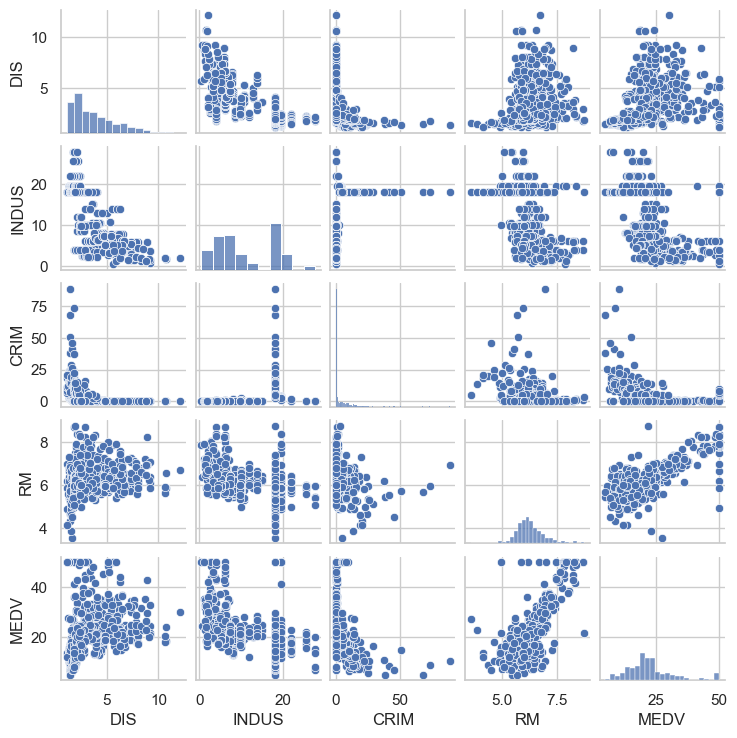

In [7]:
sns.set(style='whitegrid', context='notebook')
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=1.5)
plt.show()

In [8]:
df[cols].corr()

,DIS,INDUS,CRIM,RM,MEDV
DIS,1.000000,-0.708027,-0.379670,0.205246,0.249929
INDUS,-0.708027,1.000000,0.406583,-0.391676,-0.483725
CRIM,-0.379670,0.406583,1.000000,-0.219247,-0.388305
RM,0.205246,-0.391676,-0.219247,1.000000,0.695360
MEDV,0.249929,-0.483725,-0.388305,0.695360,1.000000


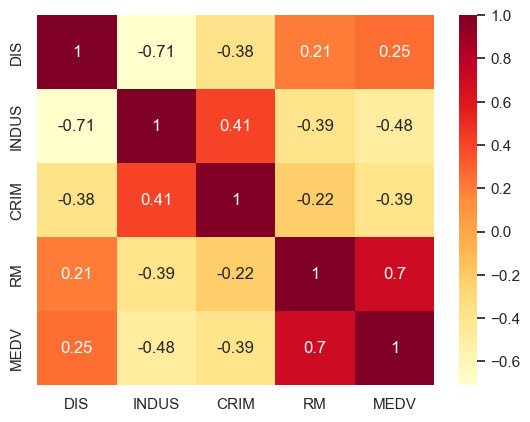

In [13]:
sns.heatmap(df[cols].corr(), cbar= True, annot= True, cmap='YlOrRd')
plt.show()

<h2>Entrenamiento del Modelo<h2>

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [16]:
X = df[['RM']]
y = df[['MEDV']]

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [17]:
slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

In [25]:
y_pred = slr.predict(X_std)
y_pred_original_scale =  sc_y.inverse_transform(y_pred)

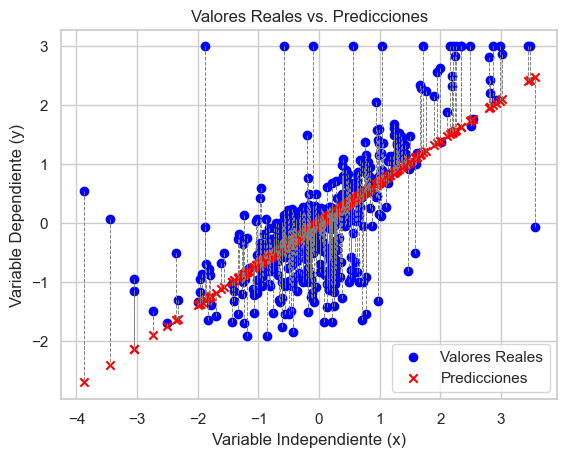

In [24]:
# Crear un scatter plot para las variables originales (x, y)
plt.scatter(X_std, y_std, color='blue', label='Valores Reales')

# Crear un scatter plot para las predicciones (x, y_pred)
plt.scatter(X_std, y_pred, color='red', marker='x', label='Predicciones')

# Dibujar una línea que conecta los valores reales y las predicciones para cada punto en x
for xi, yi, ypi in zip(X_std, y_std, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='gray', linestyle='--', linewidth=0.7)

# Configuraciones adicionales y mostrar el gráfico
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('Variable Independiente (x)')
plt.ylabel('Variable Dependiente (y)')
plt.legend()
plt.grid(True)
plt.show()

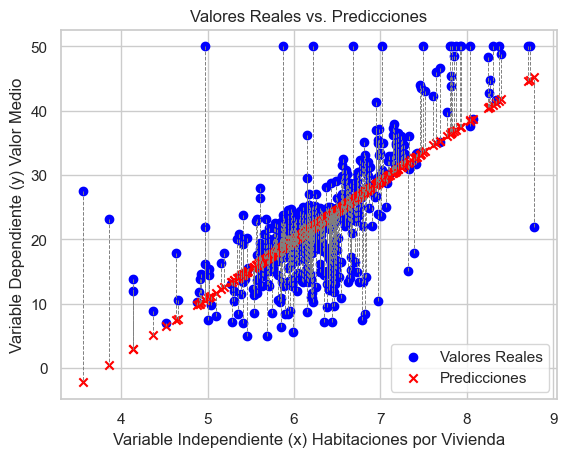

In [28]:
# Crear un scatter plot para las variables originales (x, y)
plt.scatter(X.values, y.values, color='blue', label='Valores Reales')

# Crear un scatter plot para las predicciones (x, y_pred)
plt.scatter(X.values, y_pred_original_scale, color='red', marker='x', label='Predicciones')

# Dibujar una línea que conecta los valores reales y las predicciones para cada punto en x
for xi, yi, ypi in zip(X.values, y.values, y_pred_original_scale):
    plt.plot([xi, xi], [yi, ypi], color='gray', linestyle='--', linewidth=0.7)

# Configuraciones adicionales y mostrar el gráfico
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('Variable Independiente (x) Habitaciones por Vivienda')
plt.ylabel('Variable Dependiente (y) Valor Medio')
plt.legend()
plt.grid(True)
plt.show()

<h3>Predicciones con nuevos datos<h3>

In [38]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(pd.DataFrame([num_habitaciones], columns=['RM']))
y_indiv_pred_std = slr.predict(num_habitaciones_std)
y_indiv_pred = sc_y.inverse_transform(y_indiv_pred_std)
print(f'''Se estima que el precio de una vivienda de 5 habitaciones tiene un costo estimado de {y_indiv_pred[0][0]}''')

Se estima que el precio de una vivienda de 5 habitaciones tiene un costo estimado de 10.839924129462986
